<a href="https://colab.research.google.com/github/Haroldex10/Analises/blob/main/An%C3%A1lise_1_Trade_Quantitativo_(Haroldo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
## Run This Cell for Colab
!pip install yfinance
!pip install vectorbt
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 605 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 526 kB 5.9 MB/s 
     |████████████████████████████████| 292 kB 51.2 MB/s 
     |████████████████████████████████| 1.6 MB 43.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 113 kB/s 


In [ ]:
import vectorbt as vbt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Definindo parâmetros

In [ ]:
# Análise de Crypto
codigo = 'BTC-USD'
ativos_comparacao = [codigo, 'ETH-USD', 'ADA-USD']
 
 
data_inicial = '2018-01-01'  
data_final = '2019-01-01'
 
# Os preços de fechamentos dos ativos
vbt.YFData.download(ativos_comparacao, start=data_inicial, end=data_final).get('Close')

symbol,BTC-USD,ETH-USD,ADA-USD
Date,,,
2018-01-01 00:00:00+00:00,13657.200195,772.640991,0.728657
2018-01-02 00:00:00+00:00,14982.099609,884.443970,0.782587
2018-01-03 00:00:00+00:00,15201.000000,962.719971,1.079660
2018-01-04 00:00:00+00:00,15599.200195,980.921997,1.114120
2018-01-05 00:00:00+00:00,17429.500000,997.719971,0.999559
...,...,...,...
2018-12-27 00:00:00+00:00,3654.833496,116.575912,0.036944
2018-12-28 00:00:00+00:00,3923.918701,137.647018,0.041862
2018-12-29 00:00:00+00:00,3820.408691,138.018341,0.041508


## Baixando os dados

In [ ]:
precos = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get()
fechamento = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get('Close')

# Analisando a Série

In [ ]:
fechamento.vbt.plot().show()

Ao analisar o primeiro gráfico de fechamento, podemos observar que teve o seu pico em 06 de Janeiro, e tendo seu ponto mais baixo no final do ano.

In [ ]:
precos.vbt.ohlcv.plot().show()

No segundo gráfico os volumes estão seguindo a mesma equivalência, com o minimo de diferenças entre si, tendo seu pico em Janeiro, e uma constancia nos meses posteriores, principalmente entre a metade de Junho até metade de novembro.

## Gráfico comparativo

Com investimento inicial de \$1 (ou R\$ 1)

In [ ]:
vbt.YFData.download(ativos_comparacao,
                    start=data_inicial,
                    end=data_final).plot(column='Close', base=1).show()

No gráfico comparativo, podemos observar uma variancia nos ativos dentre os quais o ETH-USD, se destaca mais, sendo apenas ultrapassado pelo BTC-USD em Agosto, difente do ADA-USD, que está sempre em baixa em comparação aos demais ativos, tenho uma alta em comparação aos outros apenas no inicio do ano.

## Gráfico Quant Stat

Retorno Cumulativo, Drawdown e Retorno Diário

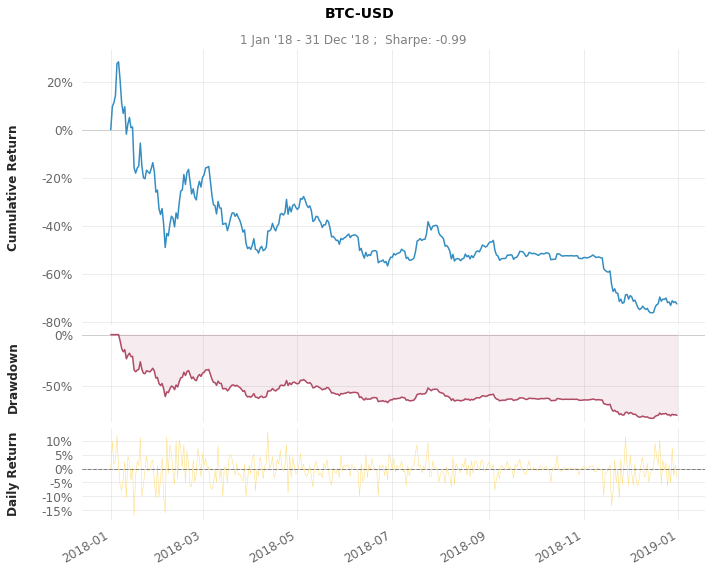

In [ ]:
warnings.filterwarnings('ignore')

retornos = fechamento.vbt.to_returns()
retornos.vbt.returns.qs.plot_snapshot(title=codigo)

# Analisando Estratégias de Trade

## Simple Moving Averages

In [ ]:
n_periodos_curta = 20
n_periodos_longa = 50

media_curta = vbt.MA.run(fechamento, n_periodos_curta, short_name='media_curta')
media_longa = vbt.MA.run(fechamento, n_periodos_longa, short_name='media_longa')

fig = fechamento.vbt.plot(trace_kwargs=dict(name='Preço de Fechamento'))
media_curta.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Curta'), fig=fig)
media_longa.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Longa'), fig=fig)

fig.show()

Observando o gráfico e suas variantes, pode se utilizar da SMA, para identificar a tendencia que o ativo está enfrentando quanto a oscilação do preço, se conseguirmos identificar a tendencia, para ter uma possivel previsão para onde ele está indo, sendo assim podemos ter um maior controle de quais pontos entrar para venda e compra de ativos.

## Relative Strength Index

In [ ]:
rsi = vbt.RSI.run(fechamento)
rsi.plot().show()

Com base no RSI, pode-se observar que os rastreios das tendencias, entre os dias 26 de janeiro a 13 de fevereiro,  22 de Junho a 5 de Julho, e 19 de Novembro até final de Dezembro, serão a época de Sobrevenda, já a Sobrecompra vai ficar com alguns picos entre os períodos de 23 de Fevereiro a 6 de Março, 9 de Maio a 22 de Maio, 1 de Agosto a 6 de Setembro, e nesses periodos serão ótimos sinais para se utilizar o Pullback para corrigir ou reverter essas tendencias.

## Stochastics

The TA-Lib Stoch function returns two lines slowk and slowd which can then be used to generate the buy/sell indicators.
A crossover signal occurs when the two lines cross in the overbought region (commonly above 80) or oversold region (commonly below 20).
When a slowk line crosses below the slowd line in the overbought region it is considered a sell indicator.
Conversely, when an increasing slowk line crosses above the slowd line in the oversold region it is considered a buy indicator.

In [ ]:
vbt.STOCH.run(precos['High'], precos['Low'], precos['Close']).plot().show()

Se você deseja operar com ações e outros ativos do mercado financeiro, é muito importante que você conheça esse indicador, e aprenda como utilizá-lo no seu dia-a-dia.

De maneira resumida, ele te ajudará a entender melhor o comportamento dos preços de diversos ativos - o que, por sua vez, te auxiliará a identificar padrões e pontos possíveis de entrada e saída das operações.

## Bollinger Bands

In [ ]:
vbt.BBANDS.run(fechamento).plot().show()

Ao usar Bandas de Bollinger, os traders costumar estipular as faixas superiores e inferiores como alvos de preço. Se o preço desvia para fora da banda inferior e cruza acima da média de 20 dias (a linha do meio), a banda superior representa a meta de preço superior.